In [62]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [63]:
battery_data = pd.read_csv('../data/battery_train.csv')

### Preprocess data

In [64]:
POLYNOMIAL_DEGREE = 20

capacity_points = np.array([])
RUL_points = np.array([])

# Extract (capacity, RUL) points (over all cycles) for every battery into (capacity_points, RUL_points)
for column in battery_data:
    if column == 'Cycle':
        continue

    capacities = battery_data[column].dropna()
    total_useful_life = len(capacities)
    RULs = np.arange(total_useful_life - 1, -1, -1) # The first measured capacity corresponds to an RUL of total_useful_life - 1 as the battery has already consumed a cycle of its life
    capacity_points = np.concatenate((capacity_points, capacities))
    RUL_points = np.concatenate((RUL_points, RULs))

capacity_points = capacity_points.reshape((-1, 1))
transformer = PolynomialFeatures(degree=POLYNOMIAL_DEGREE, include_bias=True) # Set include_bias=True to add a column of 1s to the array, such that the polynomial model becomes: Y = β_0 * 1 + β_1 * x^1 + ... + β_p * x^p + e. This column of 1s represents the intercept term β_0
x = transformer.fit_transform(capacity_points)
y = RUL_points

### Scikit-learn

model.intercept_=0.0
model.coef_=array([-3.44539597e+12,  2.59443712e+13, -7.72105553e+13,  1.03228231e+14,
       -2.44864732e+13, -8.11442347e+13, -1.55564434e+13,  3.48806215e+14,
       -5.58667219e+14,  2.81517853e+14,  2.15819127e+14, -2.33690948e+14,
       -2.22220862e+14,  3.50665950e+14,  6.94419507e+12, -1.35985950e+14,
       -1.63168950e+14,  3.66089630e+14, -2.56205165e+14,  8.36560137e+13,
       -1.08893896e+13])
[[1.         1.07858811 1.16335232 ... 3.90302494 4.2097563  4.5405931 ]
 [1.         1.0785975  1.16337256 ... 3.90363629 4.21045233 4.54138334]
 [1.         1.07860664 1.16339228 ... 3.90423182 4.21113036 4.54215316]
 ...
 [1.         0.88072768 0.77568124 ... 0.10165988 0.08953467 0.07885566]
 [1.         0.88020331 0.77475787 ... 0.1005759  0.08852724 0.07792197]
 [1.         0.87967757 0.77383263 ... 0.09950006 0.08752797 0.07699639]]


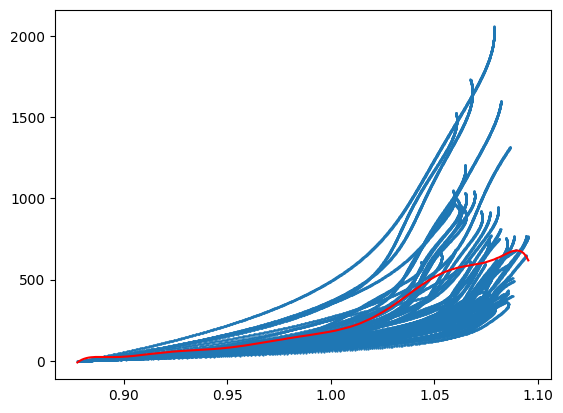

In [65]:
# Since the column of 1s has already been added to the input data x, the intercept term β_0 is already included in the model coefficients, and its value can be found at the zeroth index of model.coef_. Therefore, there is no need to separately fit the intercept term in the model and we can set fit_intercept=False
model = LinearRegression(fit_intercept=False).fit(x, y)
print(f'{model.intercept_=}')
print(f'{model.coef_=}')
coefs = model.coef_

N = 200
x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
x_axis = transformer.fit_transform(x_linspace)
y_pred = model.predict(x_axis)
plt.scatter(capacity_points, RUL_points, s=0.4)
plt.plot(x_linspace, y_pred, c='red')

X = np.linspace(0, 1.10, N)
# Y = model.intercept_ + coefs[0] * X + coefs[1] * X**2
Y = model.intercept_ + coefs[1] * X + coefs[2] * X**2
# Y = coefs[0] + coefs[1] * X + coefs[2] * X**2
# plt.plot(X, Y)
print(x)

### Statsmodels
Has more advanced summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:13:51   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.472e+12   9.51e+11     -2.598      0.0

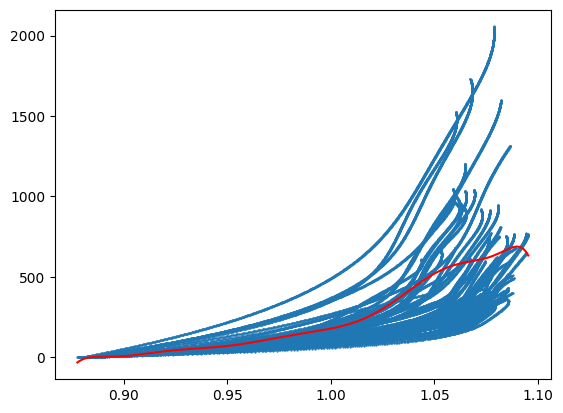

In [66]:
model = sm.OLS(y, x).fit()
print(model.summary())

N = 200
x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
x_axis = transformer.fit_transform(x_linspace)
y_pred = model.predict(x_axis)
plt.scatter(capacity_points, RUL_points, s=0.4)
plt.plot(x_linspace, y_pred, c='red')

### Forward regression to find the statistically significant polynomial degree

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                 1.274e+04
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:09   Log-Likelihood:            -3.5028e+05
No. Observations:               49433   AIC:                         7.006e+05
Df Residuals:                   49430   BIC:                         7.006e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.604e+04    486.008     33.009      0.0

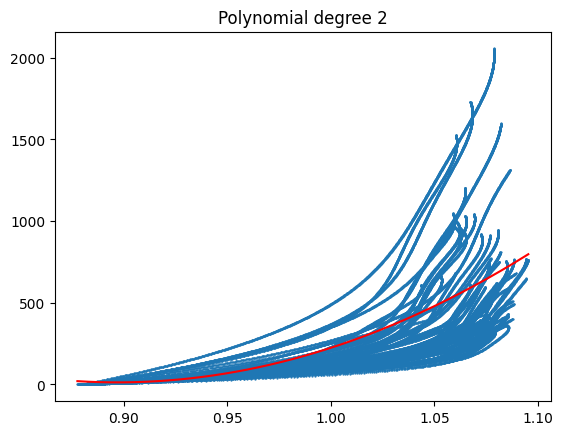

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     8526.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:10   Log-Likelihood:            -3.5025e+05
No. Observations:               49433   AIC:                         7.005e+05
Df Residuals:                   49429   BIC:                         7.005e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.785e+04   8813.926      9.967      0.0

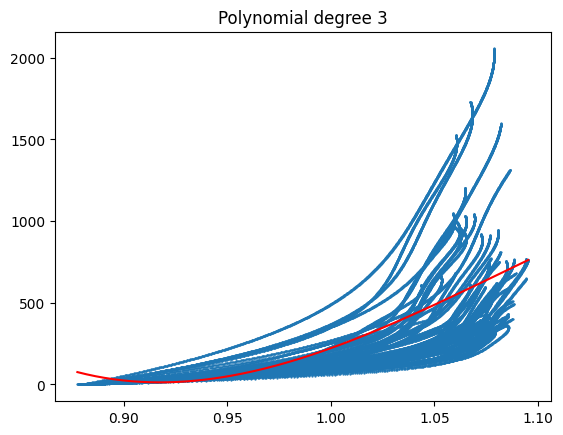

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     6519.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:11   Log-Likelihood:            -3.5008e+05
No. Observations:               49433   AIC:                         7.002e+05
Df Residuals:                   49428   BIC:                         7.002e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.826e+06   1.61e+05    -17.567      0.0

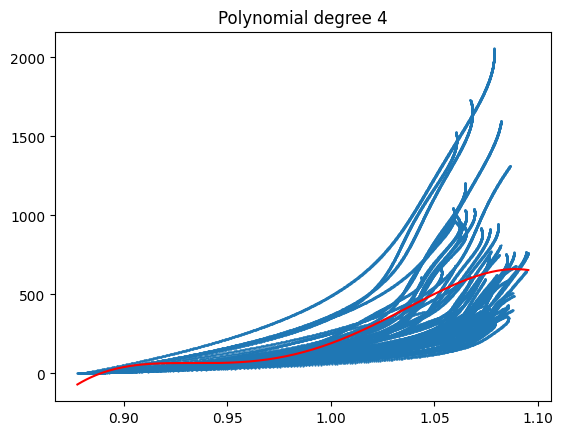

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     5230.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:11   Log-Likelihood:            -3.5006e+05
No. Observations:               49433   AIC:                         7.001e+05
Df Residuals:                   49427   BIC:                         7.002e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.746e+07   2.88e+06      6.054      0.0

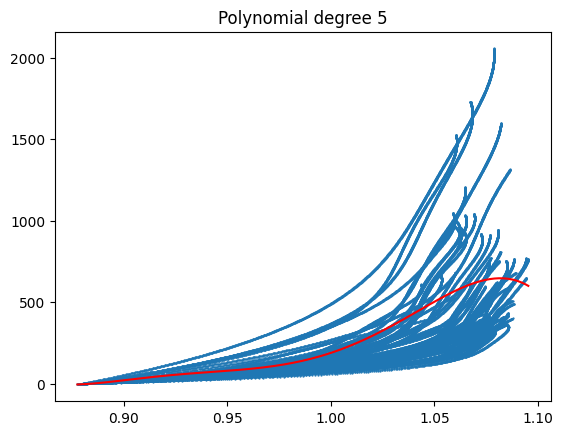

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     4366.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:12   Log-Likelihood:            -3.5004e+05
No. Observations:               49433   AIC:                         7.001e+05
Df Residuals:                   49426   BIC:                         7.002e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.914e+08   5.16e+07      5.642      0.0

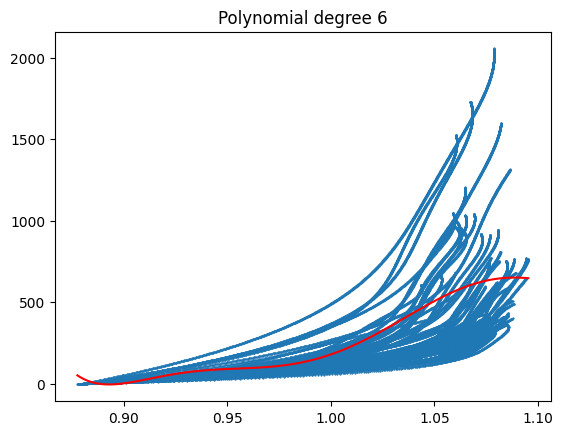

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3756.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:12   Log-Likelihood:            -3.5001e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49425   BIC:                         7.001e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.035e+09   9.29e+08     -7.572      0.0

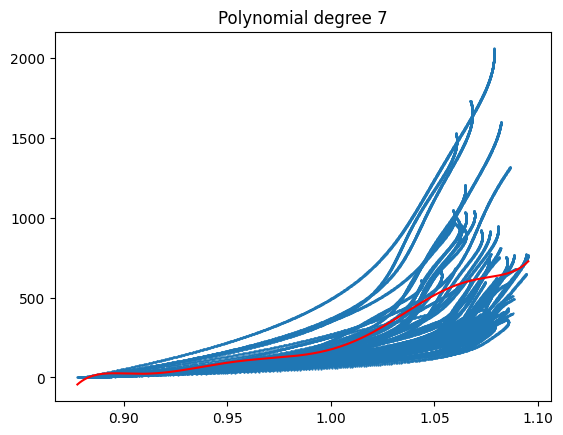

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3287.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:13   Log-Likelihood:            -3.5001e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49424   BIC:                         7.001e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.264e+10   1.67e+10      1.957      0.0

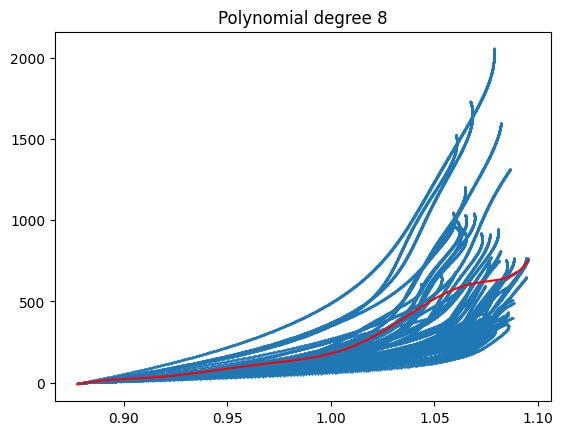

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2924.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:13   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49423   BIC:                         7.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.806e+11   3.01e+11      3.253      0.0

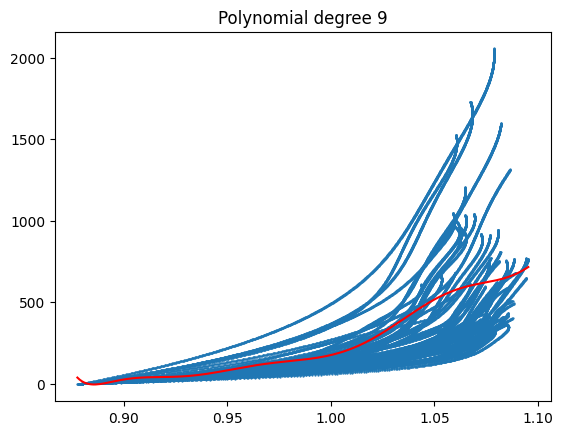

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2924.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:14   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49423   BIC:                         7.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.194e+11   1.53e+11      4.054      0.0

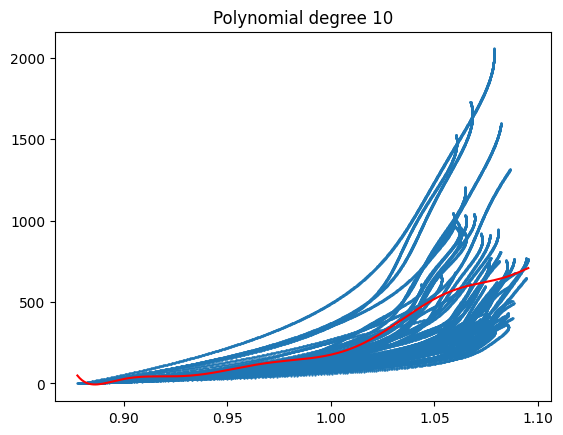

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2924.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:14   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49423   BIC:                         7.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.194e+11    8.1e+10      3.945      0.0

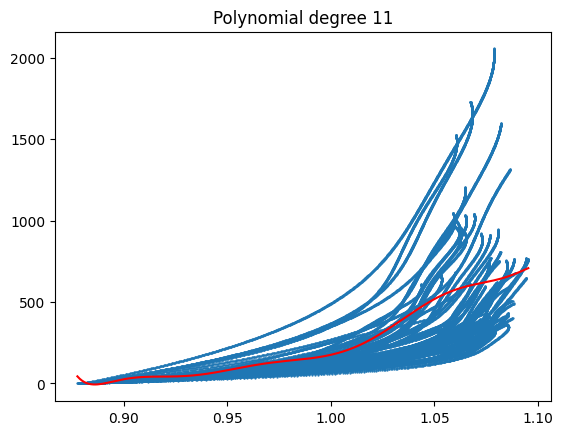

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2927.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:15   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49423   BIC:                         7.001e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.658e+12   1.31e+12     -6.614      0.0

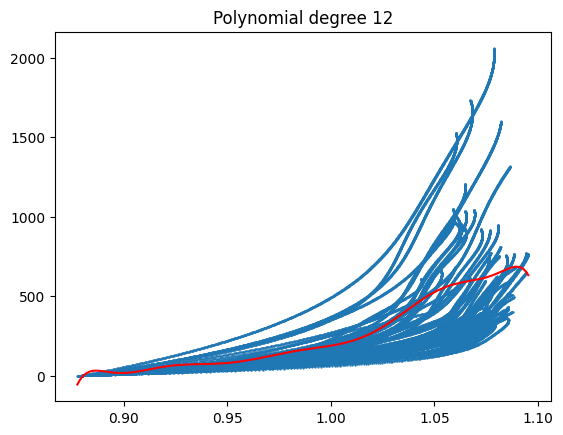

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2635.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:16   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49422   BIC:                         7.001e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.544e+12   7.65e+11     -5.944      0.0

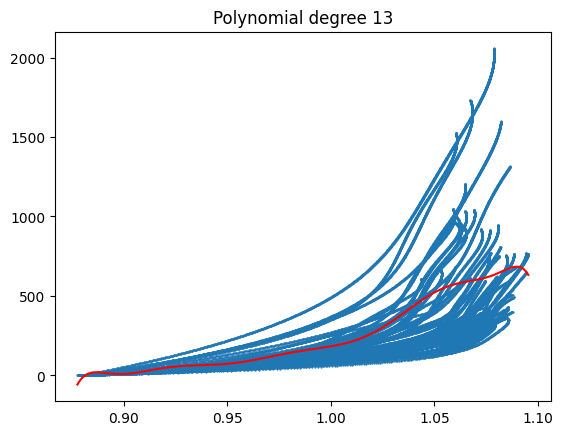

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2629.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:16   Log-Likelihood:            -3.5001e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49422   BIC:                         7.001e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.122e+12   7.73e+11     -7.915      0.0

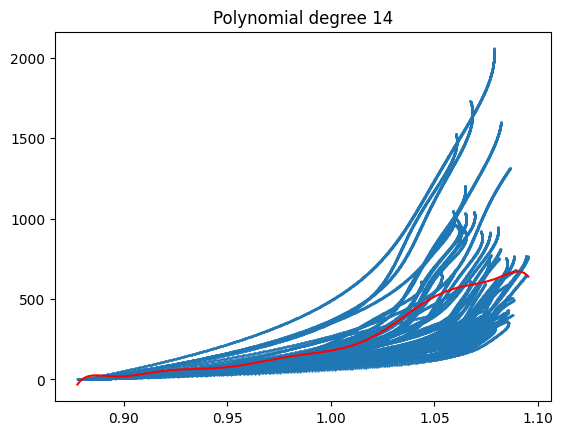

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2635.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:17   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49422   BIC:                         7.001e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.269e+12   1.17e+12     -5.354      0.0

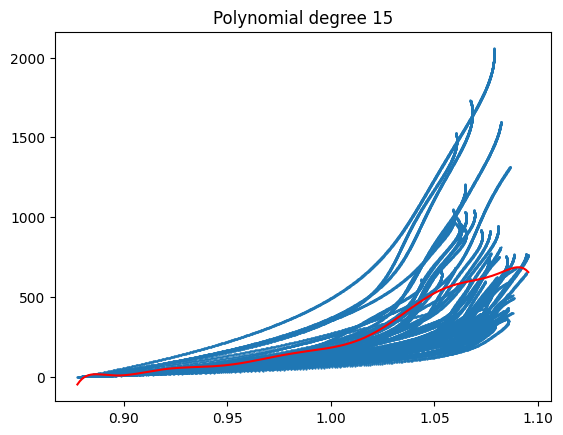

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     2621.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:18   Log-Likelihood:            -3.5004e+05
No. Observations:               49433   AIC:                         7.001e+05
Df Residuals:                   49422   BIC:                         7.002e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.475e+12    3.8e+11     -6.514      0.0

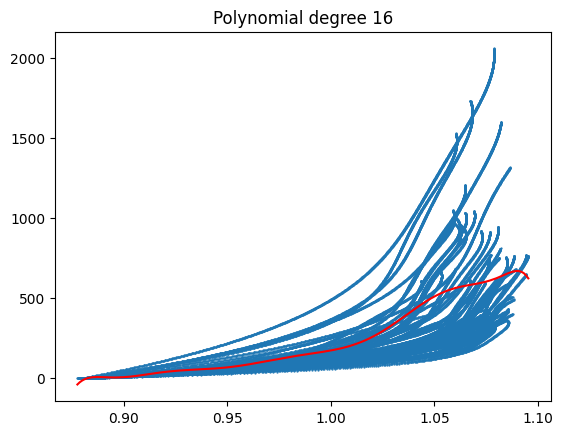

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2633.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:18   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49422   BIC:                         7.001e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.537e+12    2.5e+12      1.415      0.1

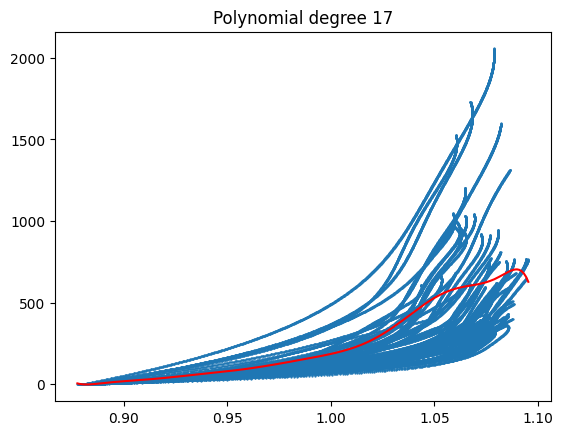

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2623.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:19   Log-Likelihood:            -3.5003e+05
No. Observations:               49433   AIC:                         7.001e+05
Df Residuals:                   49422   BIC:                         7.002e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.495e+11   1.65e+12     -0.211      0.8

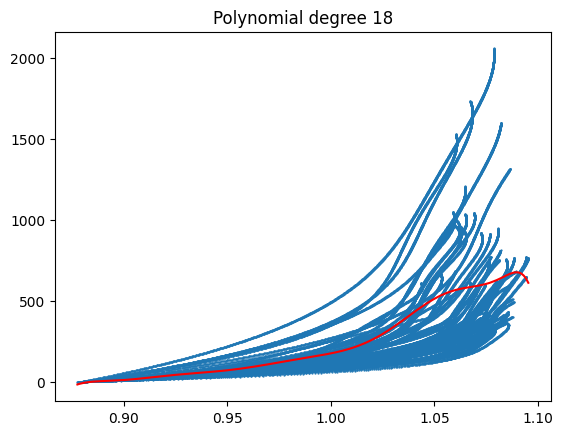

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2392.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:20   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.827e+12   1.25e+12     -2.254      0.0

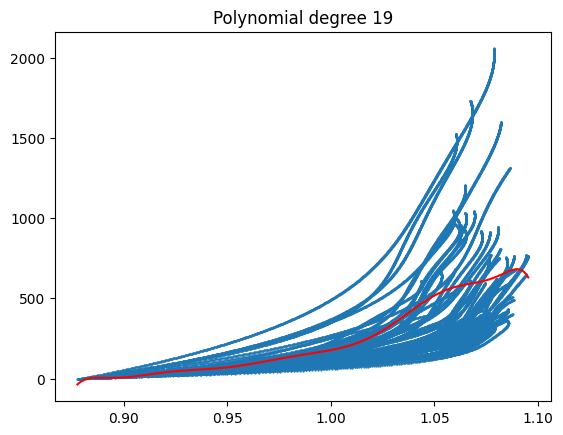

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:20   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.472e+12   9.51e+11     -2.598      0.0

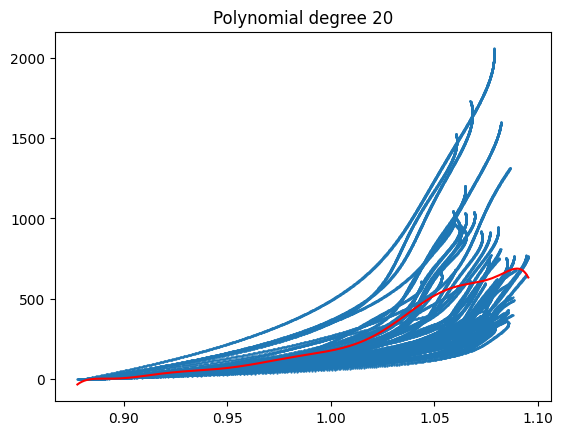

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:21   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.691e+11   4.88e+11     -1.986      0.0

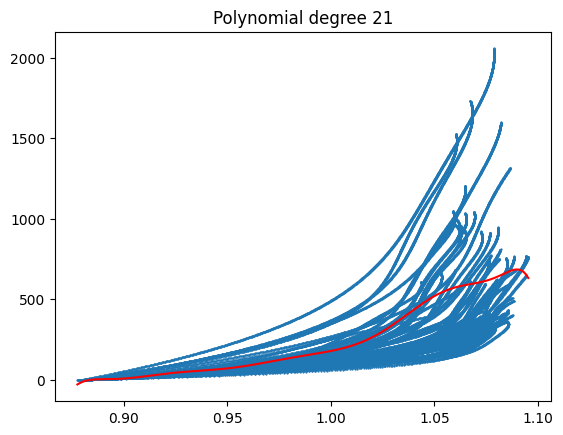

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2392.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:22   Log-Likelihood:            -3.5000e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.318e+11      3e+11     -1.772      0.0

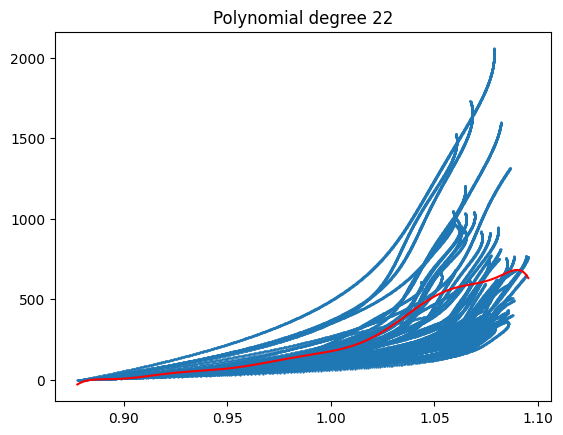

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:22   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.347e+10    1.9e+11      0.440      0.6

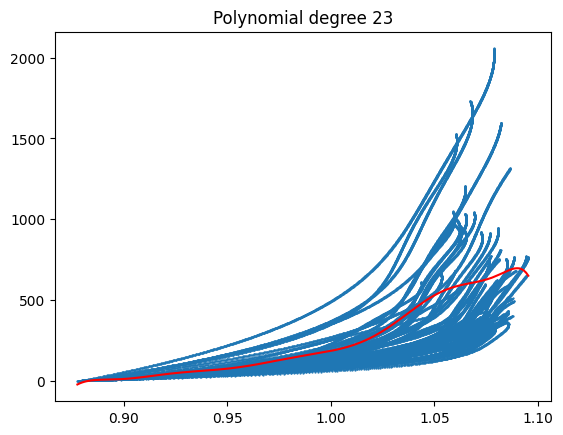

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     2395.
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:29:23   Log-Likelihood:            -3.4999e+05
No. Observations:               49433   AIC:                         7.000e+05
Df Residuals:                   49421   BIC:                         7.001e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.97e+12   2.96e+12      3.372      0.0

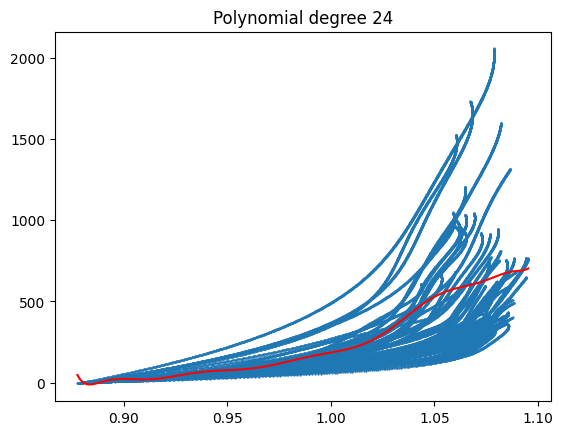

In [73]:
for polynomial_degree in range(2, 25):
    transformer = PolynomialFeatures(degree=polynomial_degree, include_bias=True)
    x = transformer.fit_transform(capacity_points)

    model = sm.OLS(y, x).fit()
    print(model.summary())

    N = 200
    x_linspace = np.linspace(np.min(capacity_points), np.max(capacity_points), N).reshape((-1, 1))
    x_axis = transformer.fit_transform(x_linspace)
    y_pred = model.predict(x_axis)
    plt.scatter(capacity_points, RUL_points, s=0.4)
    plt.plot(x_linspace, y_pred, c='red')
    plt.title(f'Polynomial degree {polynomial_degree}')
    plt.show()